In [6]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
import time
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
###### load data ############
folder_path = "C:\\Users\\User\\PycharmProjects\\scraped"
ls = []
for filename in os.listdir(folder_path):
    #print(f'{filename}')
    try:
        df = pd.read_csv(f"{folder_path}/{filename}", usecols=[0], skiprows=4, header = None, encoding='utf8', quoting=3, engine='python')
    except:
        df = pd.read_csv(f"{folder_path}/{filename}", usecols=[0], skiprows=4, header = None, encoding='unicode_escape', quoting=3, engine='python')
    finally:
        # clean data
        s = df[0].str.replace('"','')
        s = s[s!='-']
        s = s[s!='Date Uncertain']
        s = s.str.replace(r"\[[0-9]+\]", '')
        s = s[s!='']
        if len(s)>0:
            s = s.apply(lambda x: float(x))
            s.sort_values(inplace=True)
            ls.append(s)

In [3]:
len(s)

78

In [25]:
master = pd.concat(ls, ignore_index=True)
master

0          325.0
1          325.0
2          325.0
3          325.0
4          325.0
           ...  
242651    1150.0
242652    1150.0
242653    1150.0
242654    1150.0
242655    1150.0
Name: 0, Length: 242656, dtype: float64

In [33]:
years = master.groupby(master).count()
years

0
125.0        67
300.0         4
325.0      1511
350.0     12758
375.0       785
          ...  
2003.0        4
2006.0       89
2007.0       14
2010.0        7
2020.0        1
Name: 0, Length: 89, dtype: int64

In [49]:
num = list(years.index)
cen = []
for n in num:
    tp = centuryFromYear(n)
    cen.append(tp)
century = years.set_axis(cen)
sum_cen = century.groupby(century.index).sum()
sum_cen

2.0        67
4.0     15058
5.0     19717
6.0     69494
7.0     30386
8.0     29726
9.0     16769
10.0    10822
11.0     4616
12.0    11319
13.0    20133
14.0    12093
16.0      450
17.0      520
19.0      636
20.0      732
21.0      115
Name: 0, dtype: int64

<AxesSubplot:>

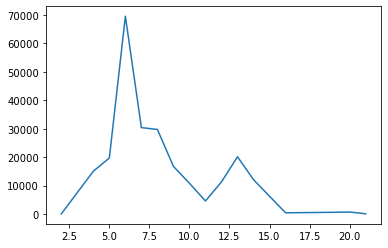

In [50]:
sum_cen.plot()

In [52]:
sum_cen.to_excel('all_greek_over_centuries.xlsx')

In [13]:
freq = pd.read_excel('den freq.xlsx')#, index_col = 'Century ')
freq

,century,freq,Total words,Percentage
0,2,50,5019,0.996214
1,4,6220,811658,0.766333
2,5,10469,1325269,0.789953
3,6,30759,4224902,0.728041
4,7,18130,2026017,0.894859
5,8,16644,1757794,0.946869
6,9,14474,1242536,1.164876
7,10,3461,532769,0.649625
8,11,616,272677,0.225908
9,12,3201,566634,0.564915


<AxesSubplot:>

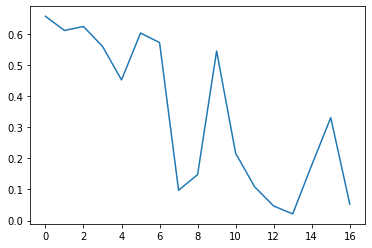

In [4]:
#freq = freq.loc[2:13]
freq['Percentage '].plot()

In [8]:
freq.columns

Index(['century', 'freq', 'Total words', 'Percentage '], dtype='object')

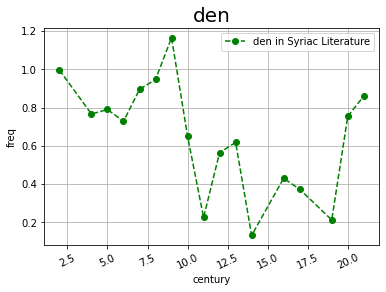

In [14]:
syr_lexeme = "den"
plt.plot(freq['century'], freq['Percentage '], color = 'g', linestyle = 'dashed',
         marker = 'o', label=f'{syr_lexeme} in Syriac Literature')
plt.xticks(rotation = 25)
plt.xlabel('century')
plt.ylabel('freq')
plt.title(syr_lexeme, fontsize = 20)

plt.grid() #not in scatter
plt.legend() #not in scatter
plt.show()

In [141]:
firsts = []
for s in ls:
    firsts.append(s.values[0])
firsts

[325.0,
 950.0,
 950.0,
 950.0,
 950.0,
 500.0,
 350.0,
 500.0,
 325.0,
 950.0,
 950.0,
 950.0,
 325.0,
 950.0,
 675.0,
 125.0,
 500.0,
 950.0,
 950.0,
 950.0,
 350.0,
 950.0,
 950.0,
 950.0,
 775.0,
 950.0,
 675.0,
 775.0,
 500.0,
 950.0,
 950.0,
 950.0,
 950.0,
 950.0,
 950.0,
 1222.0,
 1222.0,
 500.0,
 950.0,
 450.0,
 675.0,
 950.0,
 950.0,
 950.0,
 350.0,
 350.0,
 350.0,
 350.0,
 675.0,
 500.0,
 575.0,
 350.0,
 325.0,
 500.0,
 500.0,
 325.0,
 950.0,
 675.0,
 950.0,
 950.0,
 450.0,
 1500.0,
 560.0,
 500.0,
 950.0,
 950.0,
 950.0,
 1150.0,
 500.0,
 1150.0,
 950.0,
 950.0,
 675.0,
 950.0,
 550.0,
 950.0,
 950.0,
 950.0,
 650.0,
 375.0,
 701.0,
 1250.0,
 950.0,
 950.0,
 450.0,
 675.0,
 950.0,
 950.0,
 625.0,
 500.0,
 950.0,
 950.0,
 950.0,
 680.0,
 675.0,
 950.0,
 950.0,
 950.0,
 525.0,
 550.0,
 588.0,
 950.0,
 950.0,
 350.0,
 325.0,
 400.0,
 450.0,
 700.0,
 450.0,
 350.0,
 350.0,
 525.0,
 950.0,
 950.0,
 950.0,
 950.0,
 950.0,
 950.0,
 950.0,
 950.0,
 950.0,
 950.0,
 350.0,
 350.0,
 3

In [160]:
ser = pd.Series(firsts)
ser

0       325.0
1       950.0
2       950.0
3       950.0
4       950.0
        ...  
1805    125.0
1806    350.0
1807    350.0
1808    675.0
1809    500.0
Length: 1810, dtype: float64

In [161]:
def centuryFromYear(year):
    return (year) // 100 + 1

ser = ser.apply(lambda x: centuryFromYear(x))
ser.describe()

count    1810.000000
mean        7.399448
std         2.777167
min         2.000000
25%         5.000000
50%         7.000000
75%        10.000000
max        21.000000
dtype: float64

In [168]:
ser = ser.apply(lambda x: int(x))
ser

0        4
1       10
2       10
3       10
4       10
        ..
1805     2
1806     4
1807     4
1808     7
1809     6
Length: 1810, dtype: int64

In [170]:
century_ser = ser.groupby(ser).count()
century_ser=century_ser.sort_index()
century_ser

2      32
4     361
5     133
6     307
7     149
8      67
9      66
10    624
11      6
12      3
13     49
14      2
16      4
17      2
19      2
20      1
21      2
dtype: int64

In [174]:
century_ser.to_excel('century_ser.xlsx')

<AxesSubplot:>

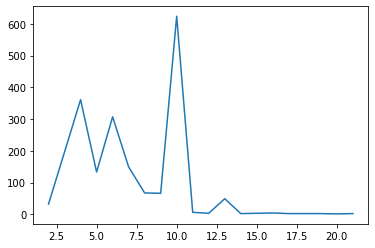

In [172]:
century_ser.plot()

In [136]:
td = ls[0]
first = td.values[0]
first

325.0

In [137]:
type(first)

numpy.float64

In [2]:
master_df = pd.read_csv('master_sedra.csv')
master_df.head()

,lexeme,syriac,glosses,etymologies,root,words,category,kaylo
0,"{'id': 1, 'uri': 'https://sedra.bethmardutho.o...",ܐܐܪ,"{'Arabic': ['هواء', 'هيئة'], 'French': ['air',...",{'Greek': ['ἀήρ']},"{'id': 1, 'uri': 'https://sedra.bethmardutho.o...","[{'id': 1, 'uri': 'https://sedra.bethmardutho....",noun,NaN
1,"{'id': 3, 'uri': 'https://sedra.bethmardutho.o...",ܐܒܗܘܬܐ,"{'Arabic': ['أبوة'], 'French': ['paternité'], ...",[],"{'id': 2, 'uri': 'https://sedra.bethmardutho.o...","[{'id': 66, 'uri': 'https://sedra.bethmardutho...",noun,NaN
2,"{'id': 5, 'uri': 'https://sedra.bethmardutho.o...",ܐܒܕ,"{'English': ['perish', 'destroy', 'lose', 'Ip'...",[],"{'id': 4, 'uri': 'https://sedra.bethmardutho.o...","[{'id': 75, 'uri': 'https://sedra.bethmardutho...",verb,NaN
3,"{'id': 6, 'uri': 'https://sedra.bethmardutho.o...",ܐܒܕܢܐ,"{'Arabic': ['هلاك', 'خسارة، خراب', 'نهاية'], '...",[],"{'id': 4, 'uri': 'https://sedra.bethmardutho.o...","[{'id': 119, 'uri': 'https://sedra.bethmarduth...",noun,pʿal
4,"{'id': 7, 'uri': 'https://sedra.bethmardutho.o...",ܐܒܝܕܐ,"{'English': ['perished', 'lost', 'lost, gone a...",[],"{'id': 4, 'uri': 'https://sedra.bethmardutho.o...","[{'id': 48231, 'uri': 'https://sedra.bethmardu...",participle adjective,pʿal


In [3]:
master_df.columns

Index(['lexeme', 'syriac', 'glosses', 'etymologies', 'root', 'words',
       'category', 'kaylo'],
      dtype='object')

In [3]:
folder_path = "C:\\Users\\User\\PycharmProjects\\scraped"
# lexeme = "ܬܐܘܪܝܐ"
# syr_pattern = f'[word="[ܒܕܘܟܠܡ]*{syr_lexeme}.?"]'
# url = f'https://simtho.bethmardutho.org/crystal/#concordance?corpname=simthoV2&tab=advanced&queryselector=cql&refs=%3Ddoc.Epoch&default_attr=word&cql={syr_pattern}'

In [4]:
def get_simtho_csv(url, lexeme):    
    chrome = webdriver.ChromeOptions()
    chrome.add_experimental_option("prefs", {'download.default_directory': folder_path})    
    driver = webdriver.Chrome(ChromeDriverManager().install(), options=chrome)
    driver.get(url)
    driver.find_element_by_id("btnGoAdv").click()
    wait = WebDriverWait(driver, 10)
    element = wait.until(EC.element_to_be_clickable((By.ID, "btndownload")))
    driver.find_element_by_id("btndownload").click()
    element = wait.until(EC.element_to_be_clickable((By.CLASS_NAME, "btn-crystal")))
    driver.find_elements_by_class_name("btn-crystal")[1].click()
    cond = True
    while cond:
        newest = latest_download_file()
        if newest.startswith('concordance'):
            cond = False
        else:
            print('sleep')
            time.sleep(2)
    driver.close()  
    
def latest_download_file():
    path = folder_path
    os.chdir(path)
    files = sorted(os.listdir(os.getcwd()), key=os.path.getmtime)
    try:
        newest = files[-1]
    except:
        newest = ''
    return newest

In [ ]:
errors_ls = []
rename_er = []
for lexeme in errors:
    syr_pattern = f'[word="[ܒܕܘܟܠܡ]*{lexeme}.?"]'
    url = f'https://simtho.bethmardutho.org/crystal/#concordance?corpname=simthoV2&tab=advanced&queryselector=cql&refs=%3Ddoc.Epoch&default_attr=word&cql={syr_pattern}'
    try:
        get_simtho_csv(url, lexeme)
        time.sleep(2)
        cond = True
        while cond:
            newest = latest_download_file()
            if newest.startswith('concordance'):
                cond = False
            else:
                time.sleep(2)
            print('done')
        temp = latest_download_file()
        old_name = f'{folder_path}\\{temp}'
        new_name = f'{folder_path}\\{lexeme}.csv'
        # Renaming the file
        os.chdir(folder_path)
        try:
            os.rename(old_name, new_name)
        except:
            rename_er.append(lexeme)
            continue
    except:
        errors_ls.append(lexeme)
        continue

In [150]:
dfs = []
for filename in os.listdir(folder_path):
    df = pd.read_csv(f"{folder_path}/{filename}", usecols=[0], skiprows=4, header = None, encoding = 'utf8')
    dfs.append(df)

In [23]:
ls = []
for filename in os.listdir(folder_path):
    ls.append(filename.replace('.csv', ''))
len(ls)

1823

In [24]:
master_df['words'].loc[6:7].values

array(["[{'id': 133, 'uri': 'https://sedra.bethmardutho.org/api/word/133.json'}, {'id': 134, 'uri': 'https://sedra.bethmardutho.org/api/word/134.json'}]",
       "[{'id': 135, 'uri': 'https://sedra.bethmardutho.org/api/word/135.json'}]"],
      dtype=object)

In [182]:
url = f"https://sedra.bethmardutho.org/api/lexeme/22.json"
r = requests.get(url)
cont = r.json()
cont

[{'lexeme': {'id': 23,
   'uri': 'https://sedra.bethmardutho.org/api/lexeme/23.json'},
  'syriac': 'ܐܓܢܐ',
  'glosses': {'Arabic': ['وعاء', 'رأس عمود', 'دواليب ومحاور'],
   'French': ['pot', 'chapiteau', 'roues et essieux'],
   'English': ['water-pot', 'pitcher', 'large bowl, jug.']},
  'etymologies': [],
  'root': {'id': 18, 'uri': 'https://sedra.bethmardutho.org/api/root/18.json'},
  'words': [{'id': 22757,
    'uri': 'https://sedra.bethmardutho.org/api/word/22757.json'},
   {'id': 183, 'uri': 'https://sedra.bethmardutho.org/api/word/183.json'},
   {'id': 184, 'uri': 'https://sedra.bethmardutho.org/api/word/184.json'}],
  'category': 'noun'}]

In [5]:
etyms = master_df['etymologies'].describe()

In [4]:
loanword_df = master_df[master_df['etymologies'] != '[]']
loanword_df = loanword_df.drop_duplicates(subset = ['syriac','etymologies'])
loanword_df

,lexeme,syriac,glosses,etymologies,root,words,category,kaylo
0,"{'id': 1, 'uri': 'https://sedra.bethmardutho.o...",ܐܐܪ,"{'Arabic': ['هواء', 'هيئة'], 'French': ['air',...",{'Greek': ['ἀήρ']},"{'id': 1, 'uri': 'https://sedra.bethmardutho.o...","[{'id': 1, 'uri': 'https://sedra.bethmardutho....",noun,NaN
17,"{'id': 20, 'uri': 'https://sedra.bethmardutho....",ܐܓܘܢܐ,"{'Arabic': ['مصارعة, جهاد'], 'French': ['lutte...",{'Greek': ['ἀγών']},"{'id': 15, 'uri': 'https://sedra.bethmardutho....","[{'id': 173, 'uri': 'https://sedra.bethmarduth...",noun,NaN
31,"{'id': 36, 'uri': 'https://sedra.bethmardutho....",ܐܕܫܐ,"{'Arabic': ['نوع, جنس', 'ثمرة, إنتاج'], 'Frenc...",{'Greek': ['εἶδος']},"{'id': 29, 'uri': 'https://sedra.bethmardutho....","[{'id': 250, 'uri': 'https://sedra.bethmarduth...",noun,NaN
40,"{'id': 46, 'uri': 'https://sedra.bethmardutho....",ܐܘܟܪܣܛܝܐ,{'English': ['Eucharist']},{'Greek': ['εὐχαριστία']},"{'id': 37, 'uri': 'https://sedra.bethmardutho....","[{'id': 269, 'uri': 'https://sedra.bethmarduth...",noun,NaN
43,"{'id': 49, 'uri': 'https://sedra.bethmardutho....",ܐܘܢ,"{'Arabic': ['آه !'], 'French': ['oh'], 'Englis...",{'Latin': ['O']},"{'id': 39, 'uri': 'https://sedra.bethmardutho....","[{'id': 280, 'uri': 'https://sedra.bethmarduth...",particle,NaN
...,...,...,...,...,...,...,...,...
30841,"{'id': 33753, 'uri': 'https://sedra.bethmardut...",ܗܦܐܛܘܣܐܣ,[],{'Greek': ['ἐπάταξας']},NaN,"[{'id': 60108, 'uri': 'https://sedra.bethmardu...",verb,NaN
30842,"{'id': 33754, 'uri': 'https://sedra.bethmardut...",ܗܦܐܠܗܐܘܬܣܝܣܐܢ,[],{'Greek': ['παλαιόω']},NaN,"[{'id': 60109, 'uri': 'https://sedra.bethmardu...",verb,NaN
30843,"{'id': 33755, 'uri': 'https://sedra.bethmardut...",ܗܦܐܠܗܐܩܬܝ,[],{'Greek': ['παλαιόω']},NaN,"[{'id': 60110, 'uri': 'https://sedra.bethmardu...",verb,NaN
30844,"{'id': 33756, 'uri': 'https://sedra.bethmardut...",ܗܦܐܢܝܣܛܐܡܗܢܝܘ,[],{'Greek': ['ἐπανίστημι']},NaN,"[{'id': 60111, 'uri': 'https://sedra.bethmardu...",verb,NaN


In [19]:
loanword_df['origin_lang'] = loanword_df['etymologies'].apply(lambda x: str.split(x, sep=f'\':')[0])
loanword_df['origin_lang'] = loanword_df['origin_lang'].apply(lambda x: str.replace(x, "{'", ""))
loanword_df.head()

,lexeme,syriac,glosses,etymologies,root,words,category,kaylo,origin_lang
0,"{'id': 1, 'uri': 'https://sedra.bethmardutho.o...",ܐܐܪ,"{'Arabic': ['هواء', 'هيئة'], 'French': ['air',...",{'Greek': ['ἀήρ']},"{'id': 1, 'uri': 'https://sedra.bethmardutho.o...","[{'id': 1, 'uri': 'https://sedra.bethmardutho....",noun,NaN,Greek
17,"{'id': 20, 'uri': 'https://sedra.bethmardutho....",ܐܓܘܢܐ,"{'Arabic': ['مصارعة, جهاد'], 'French': ['lutte...",{'Greek': ['ἀγών']},"{'id': 15, 'uri': 'https://sedra.bethmardutho....","[{'id': 173, 'uri': 'https://sedra.bethmarduth...",noun,NaN,Greek
31,"{'id': 36, 'uri': 'https://sedra.bethmardutho....",ܐܕܫܐ,"{'Arabic': ['نوع, جنس', 'ثمرة, إنتاج'], 'Frenc...",{'Greek': ['εἶδος']},"{'id': 29, 'uri': 'https://sedra.bethmardutho....","[{'id': 250, 'uri': 'https://sedra.bethmarduth...",noun,NaN,Greek
40,"{'id': 46, 'uri': 'https://sedra.bethmardutho....",ܐܘܟܪܣܛܝܐ,{'English': ['Eucharist']},{'Greek': ['εὐχαριστία']},"{'id': 37, 'uri': 'https://sedra.bethmardutho....","[{'id': 269, 'uri': 'https://sedra.bethmarduth...",noun,NaN,Greek
43,"{'id': 49, 'uri': 'https://sedra.bethmardutho....",ܐܘܢ,"{'Arabic': ['آه !'], 'French': ['oh'], 'Englis...",{'Latin': ['O']},"{'id': 39, 'uri': 'https://sedra.bethmardutho....","[{'id': 280, 'uri': 'https://sedra.bethmarduth...",particle,NaN,Latin


In [33]:
loanword_df['origin_lang_word'] = loanword_df['etymologies'].apply(lambda x: str.split(x, sep=f'\': [')[1])
loanword_df['origin_lang_word'] = loanword_df['origin_lang_word'].apply(lambda x: str.replace(x, "']}", ""))
loanword_df['origin_lang_word'] = loanword_df['origin_lang_word'].apply(lambda x: str.replace(x, "'", ""))
loanword_df.head()

,lexeme,syriac,glosses,etymologies,root,words,category,kaylo,origin_lang,origin_lang_word
0,"{'id': 1, 'uri': 'https://sedra.bethmardutho.o...",ܐܐܪ,"{'Arabic': ['هواء', 'هيئة'], 'French': ['air',...",{'Greek': ['ἀήρ']},"{'id': 1, 'uri': 'https://sedra.bethmardutho.o...","[{'id': 1, 'uri': 'https://sedra.bethmardutho....",noun,NaN,Greek,ἀήρ
17,"{'id': 20, 'uri': 'https://sedra.bethmardutho....",ܐܓܘܢܐ,"{'Arabic': ['مصارعة, جهاد'], 'French': ['lutte...",{'Greek': ['ἀγών']},"{'id': 15, 'uri': 'https://sedra.bethmardutho....","[{'id': 173, 'uri': 'https://sedra.bethmarduth...",noun,NaN,Greek,ἀγών
31,"{'id': 36, 'uri': 'https://sedra.bethmardutho....",ܐܕܫܐ,"{'Arabic': ['نوع, جنس', 'ثمرة, إنتاج'], 'Frenc...",{'Greek': ['εἶδος']},"{'id': 29, 'uri': 'https://sedra.bethmardutho....","[{'id': 250, 'uri': 'https://sedra.bethmarduth...",noun,NaN,Greek,εἶδος
40,"{'id': 46, 'uri': 'https://sedra.bethmardutho....",ܐܘܟܪܣܛܝܐ,{'English': ['Eucharist']},{'Greek': ['εὐχαριστία']},"{'id': 37, 'uri': 'https://sedra.bethmardutho....","[{'id': 269, 'uri': 'https://sedra.bethmarduth...",noun,NaN,Greek,εὐχαριστία
43,"{'id': 49, 'uri': 'https://sedra.bethmardutho....",ܐܘܢ,"{'Arabic': ['آه !'], 'French': ['oh'], 'Englis...",{'Latin': ['O']},"{'id': 39, 'uri': 'https://sedra.bethmardutho....","[{'id': 280, 'uri': 'https://sedra.bethmarduth...",particle,NaN,Latin,O


In [6]:
loanword_df = pd.read_csv('loanwords_master.csv')

In [7]:
loanword_df['origin_lang'].describe()

count      2952
unique       12
top       Greek
freq       2693
Name: origin_lang, dtype: object

In [8]:
only_greek = loanword_df[loanword_df['origin_lang'] == 'Greek']
only_greek

,Unnamed: 0,lexeme,syriac,glosses,etymologies,root,words,category,kaylo,origin_lang,origin_lang_word
0,0,"{'id': 1, 'uri': 'https://sedra.bethmardutho.o...",ܐܐܪ,"{'Arabic': ['هواء', 'هيئة'], 'French': ['air',...",{'Greek': ['ἀήρ']},"{'id': 1, 'uri': 'https://sedra.bethmardutho.o...","[{'id': 1, 'uri': 'https://sedra.bethmardutho....",noun,NaN,Greek,ἀήρ
1,17,"{'id': 20, 'uri': 'https://sedra.bethmardutho....",ܐܓܘܢܐ,"{'Arabic': ['مصارعة, جهاد'], 'French': ['lutte...",{'Greek': ['ἀγών']},"{'id': 15, 'uri': 'https://sedra.bethmardutho....","[{'id': 173, 'uri': 'https://sedra.bethmarduth...",noun,NaN,Greek,ἀγών
2,31,"{'id': 36, 'uri': 'https://sedra.bethmardutho....",ܐܕܫܐ,"{'Arabic': ['نوع, جنس', 'ثمرة, إنتاج'], 'Frenc...",{'Greek': ['εἶδος']},"{'id': 29, 'uri': 'https://sedra.bethmardutho....","[{'id': 250, 'uri': 'https://sedra.bethmarduth...",noun,NaN,Greek,εἶδος
3,40,"{'id': 46, 'uri': 'https://sedra.bethmardutho....",ܐܘܟܪܣܛܝܐ,{'English': ['Eucharist']},{'Greek': ['εὐχαριστία']},"{'id': 37, 'uri': 'https://sedra.bethmardutho....","[{'id': 269, 'uri': 'https://sedra.bethmarduth...",noun,NaN,Greek,εὐχαριστία
5,46,"{'id': 53, 'uri': 'https://sedra.bethmardutho....",ܐܘܩܝܢܐ,"{'Arabic': ['مرجاس'], 'French': ['sonde'], 'En...","{'Greek': ['ὄγκινος', 'ὄγκινος']}","{'id': 43, 'uri': 'https://sedra.bethmardutho....","[{'id': 48938, 'uri': 'https://sedra.bethmardu...",noun,NaN,Greek,"ὄγκινος, ὄγκινος"
...,...,...,...,...,...,...,...,...,...,...,...
2947,30841,"{'id': 33753, 'uri': 'https://sedra.bethmardut...",ܗܦܐܛܘܣܐܣ,[],{'Greek': ['ἐπάταξας']},NaN,"[{'id': 60108, 'uri': 'https://sedra.bethmardu...",verb,NaN,Greek,ἐπάταξας
2948,30842,"{'id': 33754, 'uri': 'https://sedra.bethmardut...",ܗܦܐܠܗܐܘܬܣܝܣܐܢ,[],{'Greek': ['παλαιόω']},NaN,"[{'id': 60109, 'uri': 'https://sedra.bethmardu...",verb,NaN,Greek,παλαιόω
2949,30843,"{'id': 33755, 'uri': 'https://sedra.bethmardut...",ܗܦܐܠܗܐܩܬܝ,[],{'Greek': ['παλαιόω']},NaN,"[{'id': 60110, 'uri': 'https://sedra.bethmardu...",verb,NaN,Greek,παλαιόω
2950,30844,"{'id': 33756, 'uri': 'https://sedra.bethmardut...",ܗܦܐܢܝܣܛܐܡܗܢܝܘ,[],{'Greek': ['ἐπανίστημι']},NaN,"[{'id': 60111, 'uri': 'https://sedra.bethmardu...",verb,NaN,Greek,ἐπανίστημι


In [9]:
greek_ls = only_greek['syriac'].tolist()
len(greek_ls)

2693

In [19]:
errors = []
for syr in greek_ls:
    if syr not in ls:
        errors.append(syr)

In [20]:
err = errors.pop(1)
errors[1]

'ܬܐܣܘܪܐ'

In [21]:
errors

['ܐܝܪܘܦܘܠܝܣ',
 'ܬܐܣܘܪܐ',
 'ܩܘܢܟܐܣ',
 'ܩܪܒܘܢܝܐ',
 'ܩܐܡܠܝܘܢ',
 'ܐܣܛܪܛܝܠܝܛܐ',
 'ܐܘܬܢܛܐܝܬ',
 'ܐܝܪܡܘܣ',
 'ܣܛܣܝܪܐ',
 'ܡܟܝܠܘܬܐ',
 'ܐܣܛܪܘܢܘܡܘܣ',
 'ܦܪܘܠܘܓܘܣ',
 'ܐܠܦܘܢܝܬܐ',
 'ܢܘܩܦܐ',
 'ܣܝܦܘܢܐ',
 'ܦܘܣܡܐ',
 'ܣܦܘܩܠܛܪܐ',
 'ܐܣܛܒܠܐ',
 'ܐܢܩܠܐ',
 'ܐܢܛܝܓܪܦܘܢ',
 'ܐܝܠܣܪܐ',
 'ܐܝܦܘܟܝ',
 'ܐܓܪܘܣܩܘܡܘܣ',
 'ܐܐܘܕܣܐ',
 'ܐܐܘܪܛܣܛܝܩܐ',
 'ܐܡܘܬܣܛܘܣ',
 'ܐܢܛܘܠܝܩܘܢ ܐܢܛܠܝܩܘܢ',
 'ܐܘܟܠܬܐ',
 'ܐܟܐܕܝܐ',
 'ܐܟܣܘܪܣܛܝܢܐ',
 'ܡܘܣܜܪܘܢ',
 'ܡܬܟܦܢܢܐ',
 'ܣܘܢܩܪܛܝܣܐ',
 'ܣܛܡܪܐ',
 'ܣܝܠܝܕܘܢ',
 'ܦܣܝܡܬܝܢ',
 'ܦܩܠܐ',
 'ܓܣܛܪܢܣ',
 'ܓܪܨܝܬܐ',
 'ܕܐܡܣܝܢ',
 'ܕܐܩܕܝܣ',
 'ܕܘܕܩܐ',
 'ܕܘܡܣܬܝܘܐ ܕܘܡܣܬܝܩܘܣ  ܕܘܡܣܛܝܩܘܢ',
 'ܕܘܣܦܘܛܝܩܐ',
 'ܕܝܐܠܘܓܘܣ',
 'ܕܝܐܠܝܩܛܝܩܘܣ',
 'ܕܝܐܩܘܢܝܐ',
 'ܕܝܘܦܣܝܜܐ',
 'ܕܝܜܓܡܐ',
 'ܕܝܡܜܪܘܢ',
 'ܕܝܩܐܡܜܐ',
 'ܕܦܢܝܕܐ',
 'ܗܢܕܩܜܐ',
 'ܗܢܝܘܟܘܣ',
 'ܗܪܜܝܩܐ',
 'ܕܩܜܐ',
 'ܐܐܝܛܝܘܣ',
 'ܐܒܪܝܡܩܘܢܛܐ',
 'ܐܒܘܛܓܪܐ',
 'ܐܒܠܘܓܝ',
 'ܐܒܪܘܙܘܣܝܣ',
 'ܣܘܢܝܘܦܜܪܘܢܝܐ',
 'ܩܝܬܪܣܛܐ',
 'ܬܐܘܪܝܜܝܩܘܣ',
 'ܛܪܘܦܪܝܢ',
 'ܟܠܝܡܘܢ',
 'ܬܘܡܠܐ',
 'ܬܪܘܒܪܝܢ',
 'ܗܦܐܩܜܗ',
 'ܦܘܠܩܐ',
 'ܜܐܜܪܐܦܘܠܘܢ',
 'ܜܐܠܝܢܗ',
 'ܜܘܡܣܐ',
 'ܜܘܢܘܣ',
 'ܜܘܣܐ',
 'ܜܘܦܐܕܝܘܢ',
 'ܜܘܦܘܢܝܩܘܣ',
 'ܜܘܦܘܣ',
 'ܜܘܦܣܐ',
 'ܜܘܪܢܘܣ',
 'ܜܙܝܡܐ'

In [59]:
folder_path = "C:\\Users\\User\\PycharmProjects\\scraped"
ls = []
for filename in os.listdir(folder_path):
    ls.append(filename.replace('.csv', ''))
len(ls)

1808

In [52]:
loanword_df.groupby('origin_lang').count()['syriac']

origin_lang
Akkadian                       16
Arabic                         65
English                         2
French                          1
Greek                        2693
Hebrew                         20
Latin                          97
Persian                        35
Persian, Middle (Pahlavi)       3
Sanskrit                        1
Spanish                         1
Name: syriac, dtype: int64

In [49]:
loanword_df = loanword_df[loanword_df['origin_lang']!='Syriac']
loanword_df

,lexeme,syriac,glosses,etymologies,root,words,category,kaylo,origin_lang,origin_lang_word
0,"{'id': 1, 'uri': 'https://sedra.bethmardutho.o...",ܐܐܪ,"{'Arabic': ['هواء', 'هيئة'], 'French': ['air',...",{'Greek': ['ἀήρ']},"{'id': 1, 'uri': 'https://sedra.bethmardutho.o...","[{'id': 1, 'uri': 'https://sedra.bethmardutho....",noun,NaN,Greek,ἀήρ
17,"{'id': 20, 'uri': 'https://sedra.bethmardutho....",ܐܓܘܢܐ,"{'Arabic': ['مصارعة, جهاد'], 'French': ['lutte...",{'Greek': ['ἀγών']},"{'id': 15, 'uri': 'https://sedra.bethmardutho....","[{'id': 173, 'uri': 'https://sedra.bethmarduth...",noun,NaN,Greek,ἀγών
31,"{'id': 36, 'uri': 'https://sedra.bethmardutho....",ܐܕܫܐ,"{'Arabic': ['نوع, جنس', 'ثمرة, إنتاج'], 'Frenc...",{'Greek': ['εἶδος']},"{'id': 29, 'uri': 'https://sedra.bethmardutho....","[{'id': 250, 'uri': 'https://sedra.bethmarduth...",noun,NaN,Greek,εἶδος
40,"{'id': 46, 'uri': 'https://sedra.bethmardutho....",ܐܘܟܪܣܛܝܐ,{'English': ['Eucharist']},{'Greek': ['εὐχαριστία']},"{'id': 37, 'uri': 'https://sedra.bethmardutho....","[{'id': 269, 'uri': 'https://sedra.bethmarduth...",noun,NaN,Greek,εὐχαριστία
43,"{'id': 49, 'uri': 'https://sedra.bethmardutho....",ܐܘܢ,"{'Arabic': ['آه !'], 'French': ['oh'], 'Englis...",{'Latin': ['O']},"{'id': 39, 'uri': 'https://sedra.bethmardutho....","[{'id': 280, 'uri': 'https://sedra.bethmarduth...",particle,NaN,Latin,O
...,...,...,...,...,...,...,...,...,...,...
30841,"{'id': 33753, 'uri': 'https://sedra.bethmardut...",ܗܦܐܛܘܣܐܣ,[],{'Greek': ['ἐπάταξας']},NaN,"[{'id': 60108, 'uri': 'https://sedra.bethmardu...",verb,NaN,Greek,ἐπάταξας
30842,"{'id': 33754, 'uri': 'https://sedra.bethmardut...",ܗܦܐܠܗܐܘܬܣܝܣܐܢ,[],{'Greek': ['παλαιόω']},NaN,"[{'id': 60109, 'uri': 'https://sedra.bethmardu...",verb,NaN,Greek,παλαιόω
30843,"{'id': 33755, 'uri': 'https://sedra.bethmardut...",ܗܦܐܠܗܐܩܬܝ,[],{'Greek': ['παλαιόω']},NaN,"[{'id': 60110, 'uri': 'https://sedra.bethmardu...",verb,NaN,Greek,παλαιόω
30844,"{'id': 33756, 'uri': 'https://sedra.bethmardut...",ܗܦܐܢܝܣܛܐܡܗܢܝܘ,[],{'Greek': ['ἐπανίστημι']},NaN,"[{'id': 60111, 'uri': 'https://sedra.bethmardu...",verb,NaN,Greek,ἐπανίστημι


In [17]:
lexeme_list = loanword_df.drop_duplicates(subset = ['syriac'])
lexeme_list

,lexeme,syriac,glosses,etymologies,root,words,category,kaylo
0,"{'id': 1, 'uri': 'https://sedra.bethmardutho.o...",ܐܐܪ,"{'Arabic': ['هواء', 'هيئة'], 'French': ['air',...",{'Greek': ['ἀήρ']},"{'id': 1, 'uri': 'https://sedra.bethmardutho.o...","[{'id': 1, 'uri': 'https://sedra.bethmardutho....",noun,NaN
17,"{'id': 20, 'uri': 'https://sedra.bethmardutho....",ܐܓܘܢܐ,"{'Arabic': ['مصارعة, جهاد'], 'French': ['lutte...",{'Greek': ['ἀγών']},"{'id': 15, 'uri': 'https://sedra.bethmardutho....","[{'id': 173, 'uri': 'https://sedra.bethmarduth...",noun,NaN
31,"{'id': 36, 'uri': 'https://sedra.bethmardutho....",ܐܕܫܐ,"{'Arabic': ['نوع, جنس', 'ثمرة, إنتاج'], 'Frenc...",{'Greek': ['εἶδος']},"{'id': 29, 'uri': 'https://sedra.bethmardutho....","[{'id': 250, 'uri': 'https://sedra.bethmarduth...",noun,NaN
40,"{'id': 46, 'uri': 'https://sedra.bethmardutho....",ܐܘܟܪܣܛܝܐ,{'English': ['Eucharist']},{'Greek': ['εὐχαριστία']},"{'id': 37, 'uri': 'https://sedra.bethmardutho....","[{'id': 269, 'uri': 'https://sedra.bethmarduth...",noun,NaN
43,"{'id': 49, 'uri': 'https://sedra.bethmardutho....",ܐܘܢ,"{'Arabic': ['آه !'], 'French': ['oh'], 'Englis...",{'Latin': ['O']},"{'id': 39, 'uri': 'https://sedra.bethmardutho....","[{'id': 280, 'uri': 'https://sedra.bethmarduth...",particle,NaN
...,...,...,...,...,...,...,...,...
30841,"{'id': 33753, 'uri': 'https://sedra.bethmardut...",ܗܦܐܛܘܣܐܣ,[],{'Greek': ['ἐπάταξας']},NaN,"[{'id': 60108, 'uri': 'https://sedra.bethmardu...",verb,NaN
30842,"{'id': 33754, 'uri': 'https://sedra.bethmardut...",ܗܦܐܠܗܐܘܬܣܝܣܐܢ,[],{'Greek': ['παλαιόω']},NaN,"[{'id': 60109, 'uri': 'https://sedra.bethmardu...",verb,NaN
30843,"{'id': 33755, 'uri': 'https://sedra.bethmardut...",ܗܦܐܠܗܐܩܬܝ,[],{'Greek': ['παλαιόω']},NaN,"[{'id': 60110, 'uri': 'https://sedra.bethmardu...",verb,NaN
30844,"{'id': 33756, 'uri': 'https://sedra.bethmardut...",ܗܦܐܢܝܣܛܐܡܗܢܝܘ,[],{'Greek': ['ἐπανίστημι']},NaN,"[{'id': 60111, 'uri': 'https://sedra.bethmardu...",verb,NaN
